In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (16, 10)

In [2]:
cd ../..

/home/ben/masterphase/Mastercode


## Dependence on position of spins

In [3]:
from helper.PartialAnalyzer import PartialAnalyzer
pa = PartialAnalyzer()
pa.load('data/partial_view/site_randomization/128_same_different_views')

In [4]:
for i in range(7):
    T, std, uncert = pa.T_curve(view_i=i)
    plt.errorbar(T, std, yerr=uncert, fmt='o')
    plt.axvline(2.269)
plt.xlabel('temperature')
plt.ylabel('standard error across test set')
plt.title('128 randomly selected spins for different random selections')

Text(0.5,1,'128 randomly selected spins for different random selections')

Does not depend on which spins are selected 

## Dependence on number of selected spins

In [5]:
par = PartialAnalyzer()
par.load_multiple('data/partial_view/site_randomization/240temps/')

In [6]:
par.n_spins[-3]
np.shape(par.results[-3][0])

(10, 240, 5)

In [7]:
par.n_spins

array([150,  10, 256,  50])

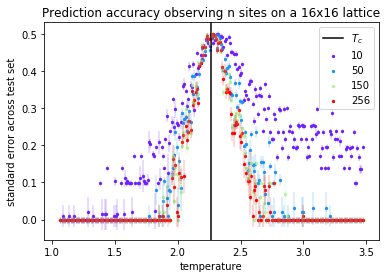

In [22]:
n_spins = par.n_spins
colors = plt.cm.rainbow(n_spins)

# plot sorted by size
I = np.arange(len(n_spins))
I = I[np.argsort(n_spins)]
n_spins = np.sort(n_spins)


select_spins = [10, 50, 150, 256]

for n, i in zip(n_spins, I):
    if not n in select_spins:
        continue
    T, std, uncert = par.T_curve(results_i=i)
    plt.scatter(T, std, label=n, c=colors[i], s=5)
    plt.errorbar(T, std, yerr=uncert, c=colors[i], alpha=0.2, fmt='|')
plt.axvline(2.269, c='k', label='$T_c$')
    
normal_256 = (T, std, uncert)
plt.xlabel('temperature')
plt.ylabel('standard error across test set')
plt.legend()
plt.title('Prediction accuracy observing n sites on a 16x16 lattice')
plt.savefig("../figures/8_3_random_site.pdf")

## Fully randomized spins
Go crazy and train network and random sets of spins from the training data at certain temperature and test with random spins from test data

### Magnetization analysis
The magnetization of the newly generated training set:

In [35]:
from helper.helper import calc_magnetization, reshape_data
from Ising.Data import IsingData

In [36]:
data = IsingData("Ising/16x16_240temp_1000each/")

Loading data from precreated .npz


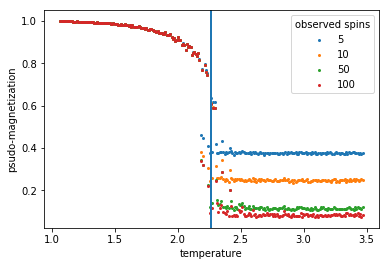

In [19]:
for n_spins in [5, 10, 50, 100]:
    dtr, dt = reshape_data(data, n_spins)
    t, m, me = calc_magnetization(dt)
    plt.scatter(t, m, label=n_spins, s=4)
    plt.axvline(2.269)
    plt.xlabel("temperature")
    plt.ylabel("psudo-magnetization")
plt.legend(title="observed spins")

In [28]:
from helper.FullyRandomizedAnalyzer import FullyRandomizedAnalyzer

In [29]:
fra = FullyRandomizedAnalyzer('data/partial_view/full_randomization/240temps/')

In [30]:
fra.n_spins

array([ 10, 256, 100])

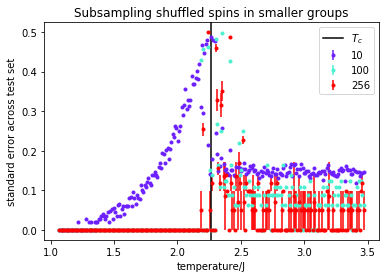

In [52]:
color = plt.cm.rainbow(fra.n_spins/np.max(fra.n_spins))

n_spins = fra.n_spins
I = np.arange(len(fra.n_spins))

I = I[np.argsort(n_spins)]
n_spins = np.sort(n_spins)

for spin, i in zip(n_spins, I):
    if spin in [5]:
        continue
    t, s, e = fra.T_curve(i)
    #plt.scatter(t, s, c=color[i])
    plt.errorbar(t, s, yerr=e, c=color[i], label=spin, fmt='o', markersize=3) 
plt.axvline(2.269, c='k', label='$T_c$')
plt.xlabel('temperature/J')
plt.ylabel('standard error across test set')
plt.legend()
plt.title('Subsampling shuffled spins in smaller groups')
plt.savefig("../figures/8_3_subsampling.pdf")

In [40]:
n_spins

array([ 10, 100, 256])

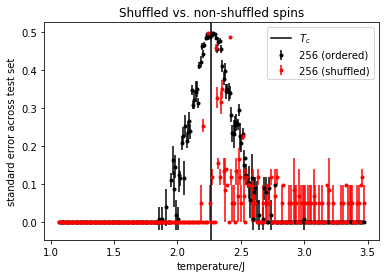

In [53]:
t, s, e = fra.T_curve(1)
plt.errorbar(normal_256[0], normal_256[1], yerr=normal_256[2], c='k', label='256 (ordered)', fmt='o', markersize=3)
plt.errorbar(t, s, yerr=e, c='r', label='256 (shuffled)', fmt='o', markersize=3)


plt.axvline(2.269, c='k', label='$T_c$')
plt.xlabel('temperature/J')
plt.ylabel('standard error across test set')
plt.legend()
plt.title('Shuffled vs. non-shuffled spins')
plt.savefig("../figures/8_3_shuffled_comparison.pdf")

In [34]:
np.shape(data.train_data[0])

NameError: name 'data' is not defined

In [40]:
temps = np.unique(data.train_data[2])

In [47]:
total_mag = [np.mean(data.test_data[0][data.test_data[2]==t,:]) for t in temps]

(-0.5, 0.5)

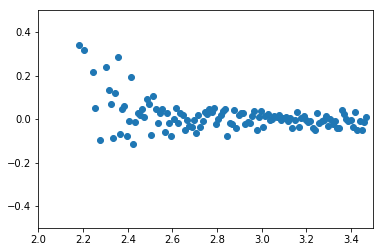

In [54]:
plt.scatter(temps, total_mag)
plt.xlim([2, 3.5])
plt.ylim([-0.5, 0.5])